## XGBoost

https://xgboost.readthedocs.io/en/stable/index.html

**핵심 파라미터**
1. **learning_rate**: 각 트리의 기여도를 조절하는 학습률로, 값이 작을수록 모델의 복잡도가 낮아지지만 더 많은 트리를 필요로 한다.
2. **n_estimators**: 트리의 개수를 의미하며, 많을수록 복잡한 모델이 된다.
3. **max_depth**: 각 트리의 최대 깊이로, 트리가 너무 깊으면 과적합될 수 있다.
4. **objective**: 손실 함수의 종류로, 회귀 문제의 경우 'reg:squarederror', 분류 문제의 경우 'binary:logistic' 등을 사용한다.

In [4]:
# !pip install XGBoost

In [10]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, random_state=0)

xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=0
)
xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

1.0
0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [13]:
# 유방암 데이터셋 이진분류
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

xgb_clf = XGBClassifier(random_state=0)
xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

1.0
0.972027972027972
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [14]:
# XGBClassifier에 조기종료 적용 -> 과적합 방지, 훈련시간 중단
xgb_clf = XGBClassifier(
    n_estimators=500,
    max_depth=3,
    learning_rate=0.1,
    random_state=0,
    early_stopping_rounds=10,       # 성능이 일정 횟수 이상 향상되지 않으면 조기종료 (반복을 중단할 횟수)
    eval_metrics='logloss'
)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state=0)
eval_set = [(X_tr, y_tr), (X_val, y_val)]
xgb_clf.fit(X_tr,y_tr, eval_set=eval_set, verbose=True)
# eval_set: 검증 데이터, verbose: 학습중 평가 결과 출력 여부

[0]	validation_0-logloss:0.57481	validation_1-logloss:0.60855
[1]	validation_0-logloss:0.50967	validation_1-logloss:0.55458
[2]	validation_0-logloss:0.45738	validation_1-logloss:0.50524
[3]	validation_0-logloss:0.40999	validation_1-logloss:0.46295
[4]	validation_0-logloss:0.36974	validation_1-logloss:0.42707
[5]	validation_0-logloss:0.33525	validation_1-logloss:0.39923
[6]	validation_0-logloss:0.30479	validation_1-logloss:0.37175
[7]	validation_0-logloss:0.27762	validation_1-logloss:0.34858
[8]	validation_0-logloss:0.25423	validation_1-logloss:0.32846
[9]	validation_0-logloss:0.23342	validation_1-logloss:0.30968
[10]	validation_0-logloss:0.21391	validation_1-logloss:0.29418
[11]	validation_0-logloss:0.19718	validation_1-logloss:0.28202
[12]	validation_0-logloss:0.18261	validation_1-logloss:0.27007
[13]	validation_0-logloss:0.16971	validation_1-logloss:0.25975
[14]	validation_0-logloss:0.15828	validation_1-logloss:0.24955
[15]	validation_0-logloss:0.14647	validation_1-logloss:0.24042
[1

/opt/anaconda3/envs/pystudy_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:28:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)


[80]	validation_0-logloss:0.01542	validation_1-logloss:0.13962
[81]	validation_0-logloss:0.01525	validation_1-logloss:0.13891
[82]	validation_0-logloss:0.01507	validation_1-logloss:0.13819
[83]	validation_0-logloss:0.01481	validation_1-logloss:0.13756
[84]	validation_0-logloss:0.01465	validation_1-logloss:0.13672
[85]	validation_0-logloss:0.01449	validation_1-logloss:0.13658
[86]	validation_0-logloss:0.01425	validation_1-logloss:0.13568
[87]	validation_0-logloss:0.01412	validation_1-logloss:0.13537
[88]	validation_0-logloss:0.01391	validation_1-logloss:0.13486
[89]	validation_0-logloss:0.01376	validation_1-logloss:0.13428
[90]	validation_0-logloss:0.01361	validation_1-logloss:0.13464
[91]	validation_0-logloss:0.01353	validation_1-logloss:0.13392
[92]	validation_0-logloss:0.01339	validation_1-logloss:0.13383
[93]	validation_0-logloss:0.01325	validation_1-logloss:0.13421
[94]	validation_0-logloss:0.01314	validation_1-logloss:0.13390
[95]	validation_0-logloss:0.01298	validation_1-logloss:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

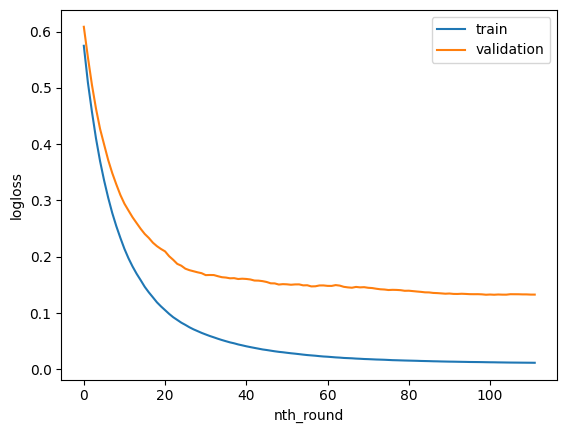

In [15]:
# 훈련 과정 시각화 
import matplotlib.pyplot as plt

result = xgb_clf.evals_result()
train_loss = result['validation_0']['logloss']
val_loss = result['validation_1']['logloss']

plt.plot(train_loss, label='train')
plt.plot(val_loss, label='validation')
plt.legend()
plt.xlabel('nth_round')
plt.ylabel('logloss')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

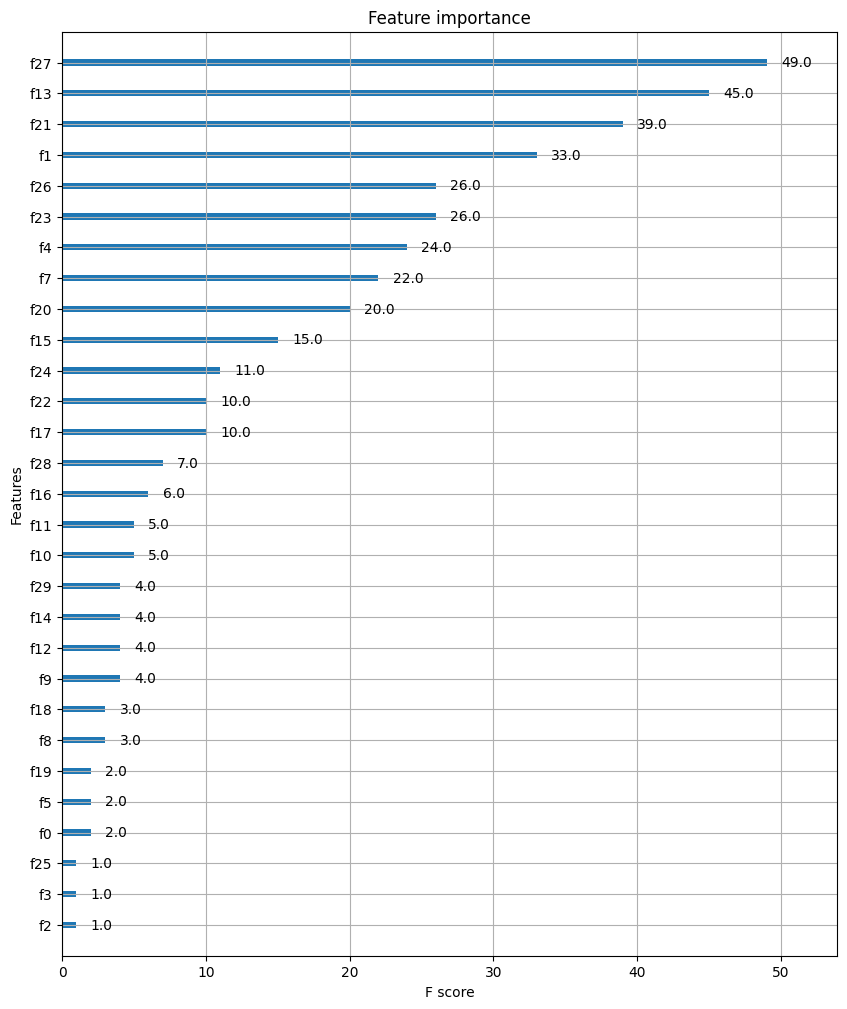

In [16]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_clf, ax=ax)